<h1><center>Introducing python through dashboard building</center></h1> 

We are going to achieve the following by the end of this activity:

1. Building a basic dashboard to understand the market movements
2. Introducing python concepts that are useful to us throught the course

### 1.Installing the modules

There is abundant free data that is available on internet in various forms. 

Most popular source is yahoo finance, but there no official API by yahoo. There are many modules that get data from yahoo.

We are going to use one such module called the 'yfinance' just beacause of the support availble through updates in case of some common issues.

### 2.Importing the Modules

A module is a collection of functions. We can organize and understand the code better by using functions and modules help us keep task wise functions together.

Ex: 
1. Pandas is a module to deal with dataframes

  https://pandas.pydata.org/docs/user_guide/index.html

2. Numpy is a module to deal with matrices

  https://numpy.org/doc/stable/

3. Matplotlib is a module to deal with plots

  https://matplotlib.org/stable/contents.html#

4. Yfinance is a module to deal with getting data from yahoo

  https://pypi.org/project/yfinance/



In [1]:
#To get the data from yahoo finance
import yfinance as yf

#For plotting purpose
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 100

#To work with data frames
import pandas as pd

### 3.Downloading market data

Let us now try to download the data for 'Reliance' from yahoo finance

In [2]:
#initialising a variable with market symbol
mkt_symbol = 'RELIANCE.NS'

#To get the OHLC data of given market as dataframe
mkt_data = yf.download(mkt_symbol,progress=False)

#To look at the sample of latest data
mkt_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-12,2562.899902,2598.750000,2557.000000,2593.100098,2593.100098,4020744
2021-11-15,2600.000000,2602.199951,2570.000000,2577.800049,2577.800049,2216708
2021-11-16,2572.050049,2575.000000,2495.000000,2517.899902,2517.899902,5232292
2021-11-17,2498.949951,2498.949951,2461.000000,2464.000000,2464.000000,4708235
2021-11-18,2460.000000,2489.000000,2450.050049,2473.300049,2473.300049,3925345


In [ ]:
type(mkt_data)

pandas.core.frame.DataFrame

###4.Plot the close price

Let us now plot the close prices to do a sanity check and basic understanding of the data

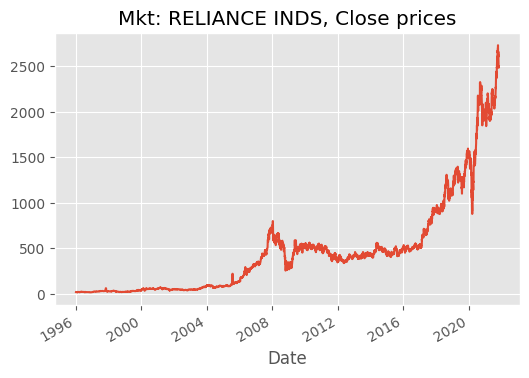

In [ ]:
#To get other than OHLC data from yahoo in a dictionary
mkt_info = yf.Ticker(mkt_symbol).get_info()

#Get the short name of the market from above dictionary
mkt_name = mkt_info['shortName']

mkt_data['Close'].plot()
plt.title(f'Mkt: {mkt_name}, Close prices')
plt.show()

#### Date time index handling by pandas

1. Custom start date
2. Custom end date
3. Custom start and end date
4. Resampling for different periods

  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

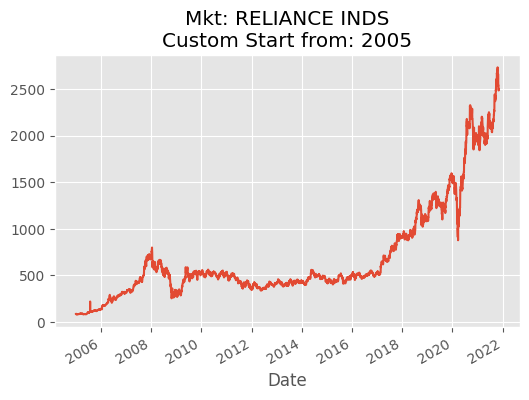

In [ ]:
#Custom start date
start_year = '2005'
mkt_data.loc[start_year:,'Close'].plot()
plt.title(f'Mkt: {mkt_name}\nCustom Start from: {start_year}')
plt.show()

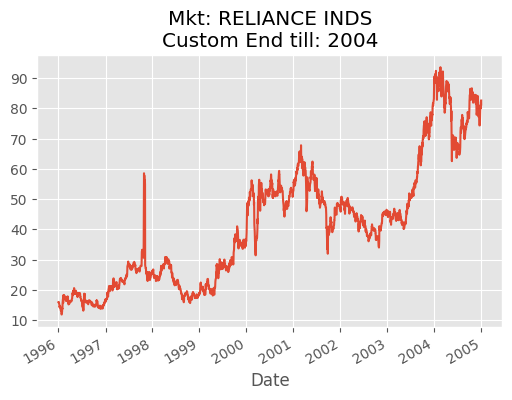

In [ ]:
#Custom end date
end_year = '2004'
mkt_data.loc[:end_year,'Close'].plot()
plt.title(f'Mkt: {mkt_name}\nCustom End till: {end_year}')
plt.show()

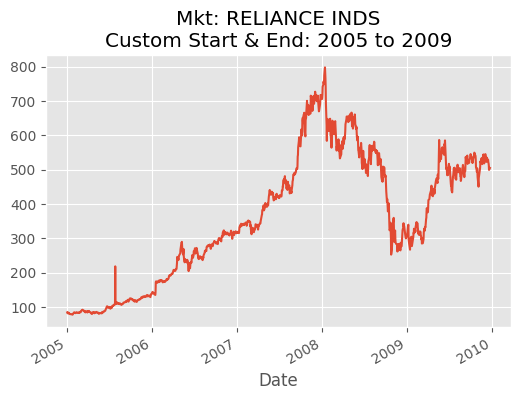

In [ ]:
#Custom start and end date
start_year = '2005'
end_year = '2009'

mkt_data.loc[start_year:end_year,'Close'].plot()
plt.title(f'Mkt: {mkt_name}\nCustom Start & End: {start_year} to {end_year}')
plt.show()

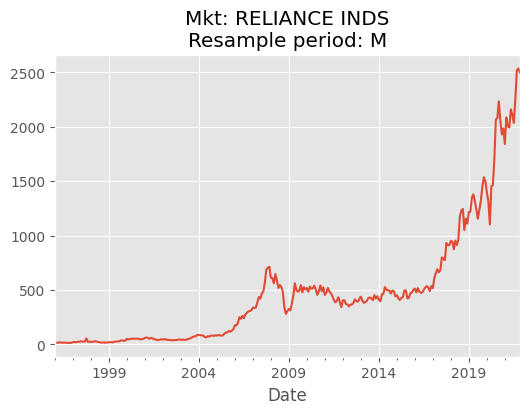

In [ ]:
#Resampling for different periods
resample_period = 'M' #Monthly resampling

mkt_data['Close'].resample(resample_period).last().plot()
plt.title(f'Mkt: {mkt_name}\nResample period: {resample_period}')
plt.show()

### 5.Download and plot the close prices of second market

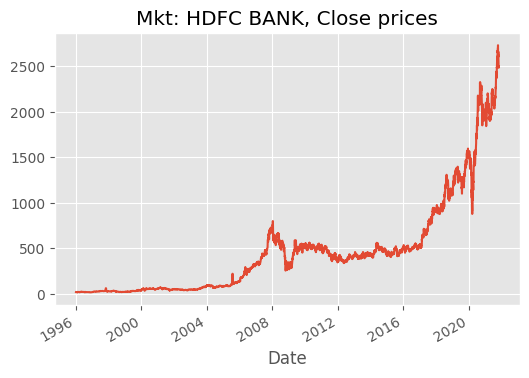

In [ ]:
mkt_symbol2 = 'HDFCBANK.NS'
mkt_data2 = yf.download(mkt_symbol2,progress=False)

mkt_info2 = yf.Ticker(mkt_symbol2).get_info()
mkt_name2 = mkt_info2['shortName']

mkt_data['Close'].plot()
plt.title(f'Mkt: {mkt_name2}, Close prices')
plt.show()

### 6.Plot both market's close prices together

Combine both the market's close prices to view them together

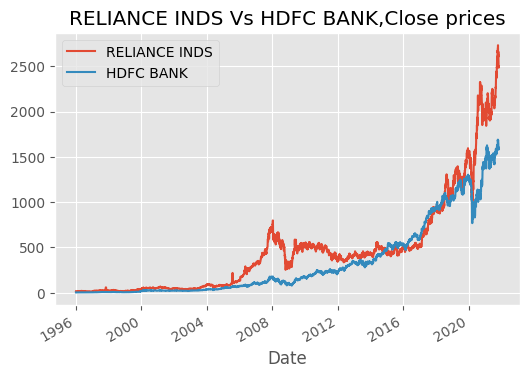

In [ ]:
combined_close_prices = pd.concat([mkt_data['Close'],mkt_data2['Close']],axis=1)

combined_close_prices.columns = [mkt_name,mkt_name2]

combined_close_prices.plot()
plt.title(f'{mkt_name} Vs {mkt_name2},Close prices')
plt.show()

Compare the prices in different time periods

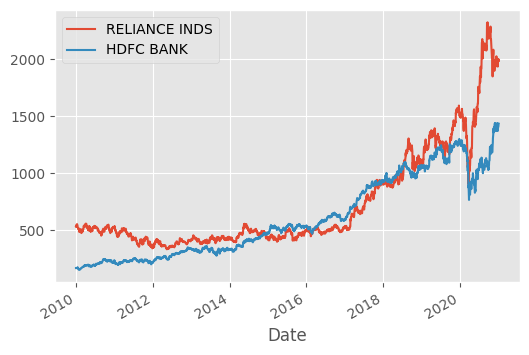

In [ ]:
start_year = '2010'
end_year = '2020'
combined_close_prices.loc[start_year:end_year,:].plot()

### 7.Buy hold performance of individual stocks during the period

Can we compare the prices directly like that?

What do you think is effective?

Then, let us see, how is it if we invest same amount in both and track the performance during the period

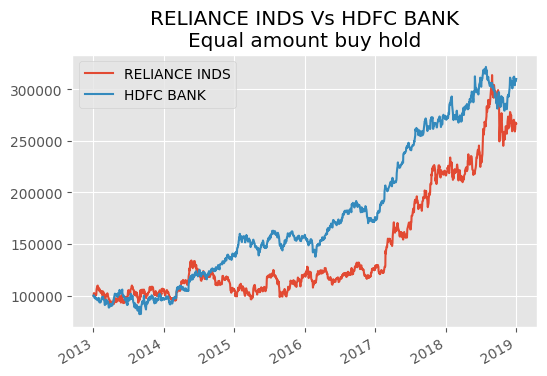

In [ ]:
investment_amount = 100000
start_year = '2013'
end_year = '2018'
period_prices = combined_close_prices.loc[start_year:end_year,:].copy()

individual_buyhold_eqCurves = pd.DataFrame()
for mkt in period_prices.columns:
  mkt_prices = period_prices[mkt].copy()
  mkt_start_price = mkt_prices.iloc[0]
  mkt_start_shares = investment_amount / mkt_start_price
  mkt_investment_curve = mkt_prices * mkt_start_shares
  individual_buyhold_eqCurves = pd.concat([individual_buyhold_eqCurves,mkt_investment_curve],axis=1)

individual_buyhold_eqCurves.plot()
plt.title(f'{mkt_name} Vs {mkt_name2}\nEqual amount buy hold')
plt.show()

Start values

In [ ]:
individual_buyhold_eqCurves.head()

,RELIANCE INDS,HDFC BANK
2013-01-01 00:00:00,100000.000000,100000.000000
2013-01-02 00:00:00,100862.372039,100416.358742
2013-01-03 00:00:00,102384.912931,99831.990590
2013-01-04 00:00:00,102515.762358,99247.622438
2013-01-07 00:00:00,101891.277714,97618.701564


End values

In [ ]:
individual_buyhold_eqCurves.tail()

,RELIANCE INDS,HDFC BANK
2018-12-24 00:00:00,259105.493851,303966.384564
2018-12-26 00:00:00,261294.154628,310058.451082
2018-12-27 00:00:00,266492.190992,307531.051691
2018-12-28 00:00:00,267764.949752,310138.773169
2018-12-31 00:00:00,266741.987781,309963.469857


### 8. Allocate equally between both the stocks

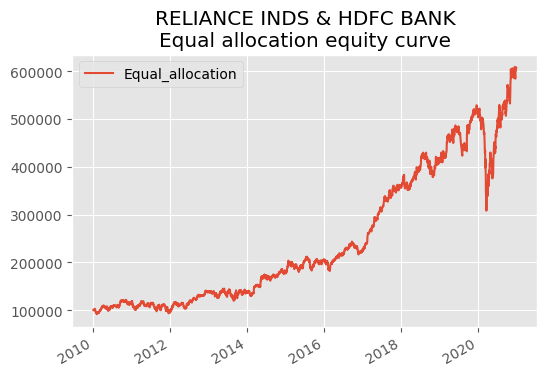

In [ ]:
investment_amount = 100000
start_year = '2010'
end_year = '2020'
period_prices = combined_close_prices.loc[start_year:end_year,:].copy()

equal_alloc_eqCurves = pd.DataFrame()
for mkt in period_prices.columns:
  mkt_prices = period_prices[mkt].copy()
  mkt_start_price = mkt_prices.iloc[0]
  mkt_start_shares = (investment_amount/2) / mkt_start_price
  mkt_investment_curve = mkt_prices * mkt_start_shares
  equal_alloc_eqCurves = pd.concat([equal_alloc_eqCurves,mkt_investment_curve],axis=1)

equal_alloc_eqCurves = pd.DataFrame({'Equal_allocation':equal_alloc_eqCurves.sum(axis=1)})
equal_alloc_eqCurves.plot()
plt.title(f'{mkt_name} & {mkt_name2}\nEqual allocation equity curve')
plt.show()

Start values

In [ ]:
equal_alloc_eqCurves.head()

,Equal_allocation
2010-01-04,100000.000000
2010-01-05,99820.818514
2010-01-06,100658.808694
2010-01-07,101628.395154
2010-01-08,101559.529663


End Values

In [ ]:
equal_alloc_eqCurves.tail()

,Equal_allocation
2020-12-24,596712.238970
2020-12-28,602187.945458
2020-12-29,605150.759079
2020-12-30,607215.927573
2020-12-31,607372.472601


### 9. Performance numbers

#### 1. Overall returns

In [ ]:
Start_val = equal_alloc_eqCurves.iloc[0][0]
end_val = equal_alloc_eqCurves.iloc[-1][0]
overall_return = (end_val / Start_val) - 1
overall_return = round(overall_return*100,2)
print(f'Overall return: {overall_return}%')

Overall return: 507.37%


#### 2. Compound annual growth rate (CAGR)

In [ ]:
start_date = equal_alloc_eqCurves.index[0]
end_date = equal_alloc_eqCurves.index[-1]
num_days = (end_date - start_date).days
num_years = num_days / 365
cagr = ((end_val / Start_val) ** (1/num_years))-1
cagr = round(cagr*100,2)
print(f'CAGR: {cagr}%')

CAGR: 17.83%


####3.Mean & Standard deviation of daily returns

Get the daily returns and look at the latest sample

In [ ]:
daily_returns = equal_alloc_eqCurves.pct_change().copy()
daily_returns.tail()

,Equal_allocation
2020-12-24,0.018796
2020-12-28,0.009176
2020-12-29,0.004920
2020-12-30,0.003413
2020-12-31,0.000258


Plot the daily returns to understand the distribution

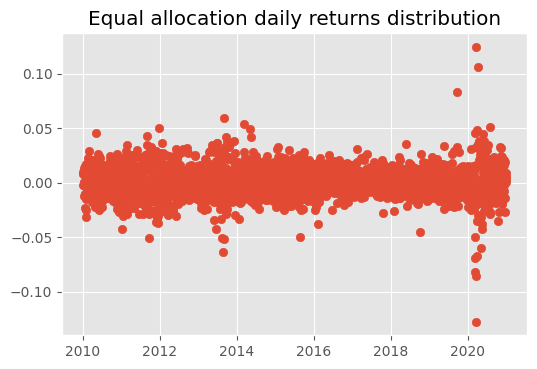

In [ ]:
plt.scatter(daily_returns.index,daily_returns['Equal_allocation'])
plt.title('Equal allocation daily returns distribution')
plt.show()

Plot daily returns and highlight mean returns

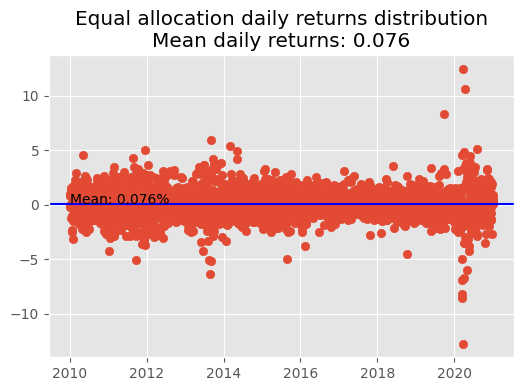

In [ ]:
daily_returns = daily_returns*100
mean_daily_returns = daily_returns.mean()['Equal_allocation']
mean_daily_returns = round(mean_daily_returns,3)

plt.scatter(daily_returns.index,daily_returns['Equal_allocation'])
plt.axhline(mean_daily_returns,color='blue')
plt.text(start_date,mean_daily_returns,f'Mean: {mean_daily_returns}%')
plt.title(f'Equal allocation daily returns distribution\nMean daily returns: {mean_daily_returns}')
plt.show()

Find the standard deviation of daily returns

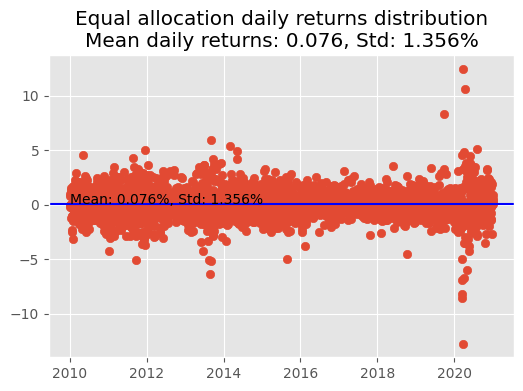

In [ ]:
std_daily_returns = daily_returns.std()['Equal_allocation']
std_daily_returns = round(std_daily_returns,3)

plt.scatter(daily_returns.index,daily_returns['Equal_allocation'])
plt.axhline(mean_daily_returns,color='blue')
plt.text(start_date,mean_daily_returns,f'Mean: {mean_daily_returns}%, Std: {std_daily_returns}%')
plt.title(f'Equal allocation daily returns distribution\nMean daily returns: {mean_daily_returns}, Std: {std_daily_returns}%')
plt.show()

#### 4. Overall summary

In [ ]:
overall_summary = pd.DataFrame([[start_date,end_date,overall_return,cagr,mean_daily_returns,std_daily_returns]],index=['Equal_Allocation'])
overall_summary.columns = ['start_Date','end_date','overall_return','cagr','mean_daily_returns','std_daily_returns']
overall_summary

,start_Date,end_date,overall_return,cagr,mean_daily_returns,std_daily_returns
Equal_Allocation,2010-01-04,2020-12-31,507.37,17.83,0.076,1.356


### 10. Function to get overall summary

In [ ]:
def get_overall_summary(eq_curve,exp_name):
  Start_val = eq_curve.iloc[0][0]
  end_val = eq_curve.iloc[-1][0]
  
  overall_return = (end_val / Start_val) - 1
  overall_return = round(overall_return*100,2)


  start_date = eq_curve.index[0]
  end_date = eq_curve.index[-1]

  num_days = (end_date - start_date).days
  num_years = num_days / 365

  cagr = ((end_val / Start_val) ** (1/num_years))-1
  cagr = round(cagr*100,2)

  daily_returns = eq_curve.pct_change().copy()
  daily_returns = daily_returns*100

  mean_daily_returns = daily_returns.mean()[exp_name]
  mean_daily_returns = round(mean_daily_returns,3)

  std_daily_returns = daily_returns.std()[exp_name]
  std_daily_returns = round(std_daily_returns,3)

  overall_summary = pd.DataFrame([[start_date,end_date,num_years,overall_return,cagr,mean_daily_returns,std_daily_returns]],index=[exp_name])
  overall_summary.columns = ['start_Date','end_date','num_years','overall_return','cagr','mean_daily_returns','std_daily_returns']
  return overall_summary

let us test the numbers with the previous values

In [ ]:
all_summaries = get_overall_summary(equal_alloc_eqCurves,'Equal_allocation')
all_summaries

,start_Date,end_date,num_years,overall_return,cagr,mean_daily_returns,std_daily_returns
Equal_allocation,2010-01-04,2020-12-31,10.99726,507.37,17.83,0.076,1.356


let us get the numbers for previous individual markets

In [ ]:
for mkt in individual_buyhold_eqCurves.columns:
  cur_mkt_summary = get_overall_summary(individual_buyhold_eqCurves[[mkt]],mkt)
  all_summaries = pd.concat([all_summaries,cur_mkt_summary])
all_summaries

,start_Date,end_date,num_years,overall_return,cagr,mean_daily_returns,std_daily_returns
Equal_allocation,2010-01-04,2020-12-31,10.99726,507.37,17.83,0.076,1.356
RELIANCE INDS,2013-01-01,2018-12-31,6.00000,166.74,17.76,0.079,1.599
HDFC BANK,2013-01-01,2018-12-31,6.00000,209.96,20.75,0.084,1.237


###11.Sector wise analysis on Nifty100

####1.Read the list of markets under the Nifty100 index

Let us upload the required files to the drive to get the list of markets

Filename: 'Nify100_Info.csv'

In [ ]:
#Upload the files
from google.colab import files
data_to_load = files.upload()

Saving Nify100_Info.csv to Nify100_Info.csv


In [ ]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the file
nifty_100_mkts_info = pd.read_csv('Nify100_Info.csv')
nifty_100_mkts_info.head()

,ShortSymbol,sector,fullTimeEmployees,longBusinessSummary,city,totalRevenue,revenuePerShare,shortName,longName,symbol,sharesOutstanding,marketCap
0,ACC,Basic Materials,6000.0,ACC Limited manufactures and sells cement and ...,Mumbai,1.607060e+11,855.790,ACC LIMITED,ACC Limited,ACC.NS,"18,77,87,008.00",4.565950e+11
1,ADANIENT,Energy,790.0,"Adani Enterprises Limited, together with its s...",Ahmedabad,5.094230e+11,462.936,ADANI ENTERPRISES,Adani Enterprises Limited,ADANIENT.NS,1099810048,1.638440e+12
2,ADANIGREEN,Utilities,795.0,Adani Green Energy Limited generates and suppl...,Ahmedabad,4.010000e+10,18.847,ADANI GREEN ENERGY,Adani Green Energy Limited,ADANIGREEN.NS,1564009984,1.880400e+12
3,ADANIPORTS,Industrials,2773.0,"Adani Ports and Special Economic Zone Limited,...",Ahmedabad,1.544360e+11,75.846,ADANI PORT SPECIAL,Adani Ports and Special Economic Zone Limited,ADANIPORTS.NS,2041750016,1.457200e+12
4,ADANITRANS,Utilities,5285.0,"Adani Transmission Limited, together with its ...",Ahmedabad,1.069470e+11,99.083,ADANI TRANSMISS.IN,Adani Transmission Limited,ADANITRANS.NS,1099810048,1.998900e+12


####2.Get the close prices of all markets

Create a list of all markets of Nifty100

In [ ]:
nifty_100_mkts = nifty_100_mkts_info['symbol'].to_list()
nifty_100_mkts[:20]

['ACC.NS',
 'ADANIENT.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ADANITRANS.NS',
 'AMBUJACEM.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AUROPHARMA.NS',
 'DMART.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BAJAJHLDNG.NS',
 'BANDHANBNK.NS',
 'BANKBARODA.NS',
 'BERGEPAINT.NS',
 'BPCL.NS',
 'BHARTIARTL.NS']

Download close prices of all stocks at once

In [ ]:
nifty_100_closeprices = yf.download(nifty_100_mkts,progress=False)['Close']
nifty_100_closeprices.tail()

,ACC.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANITRANS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJAJHLDNG.NS,BAJFINANCE.NS,BANDHANBNK.NS,BANKBARODA.NS,BERGEPAINT.NS,BHARTIARTL.NS,BIOCON.NS,BOSCHLTD.NS,BPCL.NS,BRITANNIA.NS,CADILAHC.NS,CHOLAFIN.NS,CIPLA.NS,COALINDIA.NS,COLPAL.NS,DABUR.NS,DIVISLAB.NS,DLF.NS,DMART.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,GLAND.NS,GODREJCP.NS,GRASIM.NS,HAVELLS.NS,HCLTECH.NS,HDFC.NS,...,KOTAKBANK.NS,LT.NS,LTI.NS,LUPIN.NS,M&M.NS,MARICO.NS,MARUTI.NS,MCDOWELL-N.NS,MUTHOOTFIN.NS,NAUKRI.NS,NESTLEIND.NS,NMDC.NS,NTPC.NS,ONGC.NS,PEL.NS,PGHH.NS,PIDILITIND.NS,PIIND.NS,PNB.NS,POWERGRID.NS,RELIANCE.NS,SAIL.NS,SBICARD.NS,SBILIFE.NS,SBIN.NS,SHREECEM.NS,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TORNTPHARM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29,2333.399902,1423.599976,1152.849976,693.000000,1767.400024,404.799988,4262.049805,3100.100098,689.349976,742.000000,3707.250000,17821.150391,4829.700195,7400.200195,291.450012,97.500000,741.500000,685.349976,351.100006,16952.300781,417.700012,3675.750000,502.799988,614.750000,905.049988,164.449997,1542.599976,585.849976,5150.149902,398.600006,4635.450195,4659.200195,2484.800049,148.850006,3700.199951,956.650024,1721.099976,1262.949951,1143.750000,2844.699951,...,2031.150024,1766.650024,6682.299805,922.900024,884.250000,568.450012,7482.399902,947.349976,1467.750000,6075.350098,19000.150391,143.149994,132.649994,149.050003,2601.750000,14227.849609,2313.649902,2999.949951,42.099998,185.050003,2536.250000,115.099998,1055.099976,1145.550049,502.149994,28635.250000,2186.649902,795.000000,809.500000,483.700012,1315.949951,3397.750000,1477.849976,2383.550049,2860.399902,7636.049805,740.200012,304.000000,646.750000,12.80
2021-11-01,2374.300049,1445.300049,1172.349976,704.400024,1760.550049,409.799988,4336.600098,3121.800049,697.599976,752.349976,3726.149902,17565.699219,4763.750000,7413.950195,287.750000,99.050003,753.849976,712.500000,348.299988,17563.199219,421.649994,3678.149902,501.450012,588.650024,909.250000,170.750000,1527.150024,597.049988,5228.200195,408.850006,4564.750000,4801.450195,2560.000000,150.199997,3681.649902,974.200012,1789.000000,1288.150024,1189.199951,2887.949951,...,2076.500000,1795.349976,6802.149902,944.349976,870.349976,574.750000,7615.549805,973.599976,1492.599976,6296.149902,18939.599609,145.649994,134.300003,153.149994,2615.100098,14434.049805,2362.949951,2998.699951,42.099998,187.750000,2537.800049,125.250000,1068.199951,1163.349976,515.700012,29145.750000,2235.649902,811.799988,824.900024,485.700012,1364.900024,3476.399902,1522.150024,2406.300049,2879.399902,7775.100098,720.049988,302.149994,655.450012,13.05
2021-11-02,2392.000000,1472.800049,1174.250000,702.349976,1758.300049,407.250000,4289.899902,3103.350098,691.200012,755.849976,3741.850098,17542.599609,4866.950195,7455.350098,311.000000,102.300003,755.650024,713.950012,345.549988,17745.750000,416.149994,3682.899902,495.500000,609.799988,903.400024,169.199997,1527.000000,598.049988,5205.399902,430.049988,4597.049805,4746.100098,2542.449951,150.949997,3698.449951,960.349976,1744.050049,1290.750000,1170.650024,2900.050049,...,2076.649902,1815.650024,6752.899902,930.750000,861.500000,565.799988,7791.750000,975.150024,1491.300049,6135.950195,18773.949219,141.850006,136.649994,152.949997,2700.000000,14337.299805,2343.750000,2781.899902,42.099998,185.500000,2500.800049,122.349998,1071.449951,1166.050049,521.700012,28868.150391,2250.649902,815.400024,833.799988,487.850006,1313.650024,3484.199951,1490.599976,2453.949951,2839.050049,7713.350098,720.299988,308.000000,653.799988,13.05
2021-11-03,2420.500000,1485.900024,1204.500000,709.200012,1843.349976,412.899994,4438.600098,3170.649902,685.799988,750.599976,3698.399902,17509.449219,4925.799805,7516.250000,300.350006,100.900002,761.549988,699.09997

####3.Start the data from common start date

Get the data start and end dates to find the data availability

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [ ]:
all_mkts_start_end_dates = nifty_100_closeprices.apply(lambda x: x.dropna().index.min()).sort_values(ascending=False)
all_mkts_start_end_dates = pd.DataFrame({'start_date':all_mkts_start_end_dates})
all_mkts_start_end_dates['end_date'] = nifty_100_closeprices.index.max()
all_mkts_start_end_dates['data_availability'] = all_mkts_start_end_dates['end_date'] - all_mkts_start_end_dates['start_date']
all_mkts_start_end_dates['data_availability'] = all_mkts_start_end_dates['data_availability'].dt.days / 365
all_mkts_start_end_dates.tail()

,start_date,end_date,data_availability
CIPLA.NS,1996-01-01,2021-11-04,25.860274
INFY.NS,1996-01-01,2021-11-04,25.860274
SBIN.NS,1996-01-01,2021-11-04,25.860274
TATACONSUM.NS,1996-01-01,2021-11-04,25.860274
TATAMOTORS.NS,1995-12-25,2021-11-04,25.879452


Keep the data of markets that have minimum of 10 years of data

In [ ]:
num_years_data_required = 10
req_mkts = all_mkts_start_end_dates.loc[all_mkts_start_end_dates['data_availability']>=num_years_data_required,:].copy()
req_mkts.shape

(86, 3)

In [ ]:
nifty_100_mkts_filtered = nifty_100_mkts_info.loc[nifty_100_mkts_info['symbol'].isin(req_mkts.index),:]
nifty_100_mkts_filtered.shape

(86, 12)

In [ ]:
filtered_mkts_data = nifty_100_closeprices.loc[:,nifty_100_closeprices.columns.isin(nifty_100_mkts_filtered['symbol'])].copy()
filtered_mkts_data.shape

(6505, 86)

Change the name of the columns from symbol to shortname

In [ ]:
filtered_mkts_data = filtered_mkts_data.loc[:,nifty_100_mkts_filtered['symbol']]
filtered_mkts_data.columns = nifty_100_mkts_filtered['shortName']
filtered_mkts_data.tail()

shortName,ACC LIMITED,ADANI ENTERPRISES,ADANI PORT SPECIAL,AMBUJA CEMENTS LTD,APOLLO HOSPITALS.,ASIAN PAINTS LTD,AUROBINDO PHARMA,AXIS BANK,BAJAJ AUTO LTD,BAJAJ FINANCE LTD,BAJAJ FINSERV LTD,BAJAJ HLDG & INVES,BK OF BARODA,BERGER PAINTS IND,BHARAT PETROL CORP,BHARTI AIRTEL LTD,BIOCON LTD,BOSCH LTD,BRITANNIA INDS,CADILA HEALTHCARE,CHOLAMANDALAM INV,CIPLA LTD,COAL INDIA LTD,COLGATE-PALM (IND),DLF LIMITED,DABUR INDIA LTD,DIVI'S LABORATORIE,DR REDDYS LABS,EICHER MOTORS,GAIL INDIA LTD,GODREJ CONSUMER PR,GRASIM INDUSTRIES,HCL TECHNOLOGIES,HDFC BANK,HAVELLS INDIA,HERO MOTOCORP LTD,HINDALCO INDS,HINDUSTAN PETROL,HINDUSTAN UNILEVER,HOUSING DEVEL FIN,...,INFOSYS LTD,JSW STEEL LTD,JINDAL STEEL & PWR,JUBILANT FOODWORKS,KOTAK MAHINDRA BAN,LARSEN & TOUBRO,LUPIN LTD,MAHINDRA &MAHINDRA,MARICO LTD,MARUTI SUZUKI IND,MUTHOOT FINANCE LT,NMDC LTD,NTPC LTD,NESTLE INDIA,OIL & NATURAL GAS,PI INDUSTRIES,PIDILITE INDUSTRIE,PIRAMAL ENTERPRISE,POWER GRID CORP,PROCTER&GAMBLE IND,PUNJAB NATL BANK,RELIANCE INDS,SHREE CEMENT LTD,SIEMENS INDIA LTD,STATE BK OF INDIA,STEEL AUTHOR INDIA,SUN PHARMACEUTICAL,TATA CONSULTANCY S,TATA CONSUMER PRODUCT LTD,TATA MOTORS LTD.,TATA STEEL LTD,TECH MAHINDRA,TITAN COMPANY LTD,TORRENT PHARM,UPL LIMITED,ULTRATECH CEMENT,UNITED SPIRITS,VEDANTA LIMITED,WIPRO LTD,YES BANK
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29,2333.399902,1423.599976,693.000000,404.799988,4262.049805,3100.100098,689.349976,742.000000,3707.250000,7400.200195,17821.150391,4829.700195,97.500000,741.500000,417.700012,685.349976,351.100006,16952.300781,3675.750000,502.799988,614.750000,905.049988,164.449997,1542.599976,398.600006,585.849976,5150.149902,4659.200195,2484.800049,148.850006,956.650024,1721.099976,1143.750000,1582.849976,1262.949951,2657.100098,459.799988,310.399994,2393.149902,2844.699951,...,1667.750000,669.150024,417.299988,3689.300049,2031.150024,1766.650024,922.900024,884.250000,568.450012,7482.399902,1467.750000,143.149994,132.649994,19000.150391,149.050003,2999.949951,2313.649902,2601.750000,185.050003,14227.849609,42.099998,2536.250000,28635.250000,2186.649902,502.149994,115.099998,795.000000,3397.750000,809.500000,483.700012,1315.949951,1477.849976,2383.550049,2860.399902,740.200012,7636.049805,947.349976,304.000000,646.750000,12.80
2021-11-01,2374.300049,1445.300049,704.400024,409.799988,4336.600098,3121.800049,697.599976,752.349976,3726.149902,7413.950195,17565.699219,4763.750000,99.050003,753.849976,421.649994,712.500000,348.299988,17563.199219,3678.149902,501.450012,588.650024,909.250000,170.750000,1527.150024,408.850006,597.049988,5228.200195,4801.450195,2560.000000,150.199997,974.200012,1789.000000,1189.199951,1605.300049,1288.150024,2680.699951,478.149994,311.950012,2407.100098,2887.949951,...,1700.050049,688.950012,430.899994,3746.850098,2076.500000,1795.349976,944.349976,870.349976,574.750000,7615.549805,1492.599976,145.649994,134.300003,18939.599609,153.149994,2998.699951,2362.949951,2615.100098,187.750000,14434.049805,42.099998,2537.800049,29145.750000,2235.649902,515.700012,125.250000,811.799988,3476.399902,824.900024,485.700012,1364.900024,1522.150024,2406.300049,2879.399902,720.049988,7775.100098,973.599976,302.149994,655.450012,13.05
2021-11-02,2392.000000,1472.800049,702.349976,407.250000,4289.899902,3103.350098,691.200012,755.849976,3741.850098,7455.350098,17542.599609,4866.950195,102.300003,755.650024,416.149994,713.950012,345.549988,17745.750000,3682.899902,495.500000,609.799988,903.400024,169.199997,1527.000000,430.049988,598.049988,5205.399902,4746.100098,2542.449951,150.949997,960.349976,1744.050049,1170.650024,1606.750000,1290.750000,2684.300049,468.399994,303.450012,2418.899902,2900.050049,...,1697.900024,672.849976,418.899994,3755.000000,2076.649902,1815.650024,930.750000,861.500000,565.799988,7791.750000,1491.300049,141.850006,136.649994,18773.949219,152.949997,2781.899902,2343.750000,2700.000000,185.500000,14337.299805,42.099998,2500.800049,28868.150391,2250.649902

handle the na by ffill and then drop

In [ ]:
filtered_mkts_data = filtered_mkts_data.fillna(method='ffill')
filtered_mkts_data = filtered_mkts_data.dropna()

Look at the new common start date

In [ ]:
common_start_date = filtered_mkts_data.index.min()
common_end_date = filtered_mkts_data.index.max()
print(f'Start date: {common_start_date.date()}, End date: {common_end_date.date()}')

Start date: 2011-06-15, End date: 2021-11-04


####4.Find the individual markets overall performance

In [ ]:
initial_investment = 100000
start_date = '2018'
end_date = '2021'
all_equity_curves = pd.DataFrame()
all_performance_numbers = pd.DataFrame()
for mkt in filtered_mkts_data.columns:
  mkt_data_buyhold = filtered_mkts_data.loc[start_date:end_date,[mkt]].copy()

  num_shares = initial_investment / mkt_data_buyhold.iloc[0]

  mkt_data_buyhold = mkt_data_buyhold * num_shares

  all_equity_curves = pd.concat([all_equity_curves,mkt_data_buyhold],axis=1)

  cur_mkt_summary = get_overall_summary(mkt_data_buyhold,mkt)
  all_performance_numbers = pd.concat([all_performance_numbers,cur_mkt_summary])
all_performance_numbers.sort_values('cagr',ascending=False,inplace=True)


Top performing markets

In [ ]:
all_performance_numbers.head()

,start_Date,end_date,num_years,overall_return,cagr,mean_daily_returns,std_daily_returns
ADANI ENTERPRISES,2018-01-01,2021-11-04,3.843836,1546.15,107.24,0.352,3.381
DIVI'S LABORATORIE,2018-01-01,2021-11-04,3.843836,373.87,49.89,0.183,1.942
INFO EDGE,2018-01-01,2021-11-04,3.843836,342.83,47.27,0.194,2.738
BAJAJ FINANCE LTD,2018-01-01,2021-11-04,3.843836,336.07,46.69,0.193,2.713
JUBILANT FOODWORKS,2018-01-01,2021-11-04,3.843836,325.04,45.71,0.182,2.408


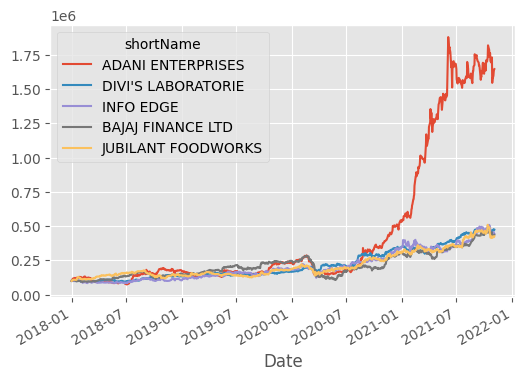

In [ ]:
top_mkts = all_performance_numbers.head().index
top_mkts_eq_curves = all_equity_curves[top_mkts]
top_mkts_eq_curves.plot()

Bottom performers

In [ ]:
all_performance_numbers.tail()

,start_Date,end_date,num_years,overall_return,cagr,mean_daily_returns,std_daily_returns
INDIAN OIL CORP,2018-01-01,2021-11-04,3.843836,-30.94,-9.18,-0.016,2.147
COAL INDIA LTD,2018-01-01,2021-11-04,3.843836,-35.98,-10.96,-0.026,2.056
BK OF BARODA,2018-01-01,2021-11-04,3.843836,-36.47,-11.13,-0.004,2.947
PUNJAB NATL BANK,2018-01-01,2021-11-04,3.843836,-75.32,-30.51,-0.107,2.858
YES BANK,2018-01-01,2021-11-04,3.843836,-95.79,-56.15,-0.175,5.603


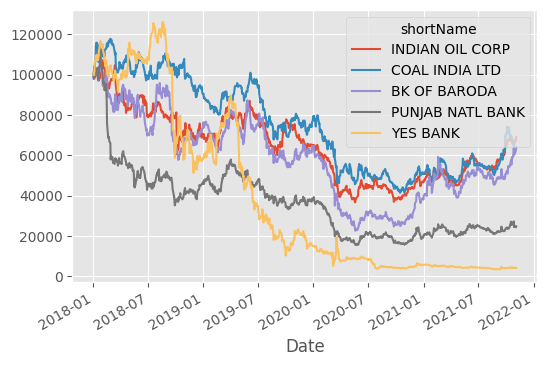

In [ ]:
bottom_mkts = all_performance_numbers.tail().index
bottom_mkts_eq_curves = all_equity_curves[bottom_mkts]
bottom_mkts_eq_curves.plot()

####5.Sector wise equal allocation performance

Look at number of markets per sector

In [ ]:
sector_wise_market_counts = nifty_100_mkts_filtered['sector'].value_counts()
sector_wise_market_counts

Basic Materials           17
Financial Services        15
Consumer Defensive        11
Healthcare                11
Consumer Cyclical          9
Energy                     7
Technology                 5
Utilities                  4
Industrials                4
Communication Services     2
Real Estate                1
Name: sector, dtype: int64

Identify sectors that have minimum number of markets

In [ ]:
num_mkts_thresh = 5
req_sectors = sector_wise_market_counts[sector_wise_market_counts>=num_mkts_thresh]
req_sectors = req_sectors.index.to_list()
req_sectors

['Basic Materials',
 'Financial Services',
 'Consumer Defensive',
 'Healthcare',
 'Consumer Cyclical',
 'Energy',
 'Technology']

Get the equity curves and performance of sector wise equal allocations

In [ ]:
initial_investment = 100000
start_date = '2018'
end_date = '2021'
all_sector_eq_curves = pd.DataFrame()
all_sector_performance = pd.DataFrame()
for sector in req_sectors:
  mkts_of_sector = nifty_100_mkts_filtered.loc[nifty_100_mkts_filtered['sector']==sector,'shortName']
  num_mkts = len(mkts_of_sector)
  #print(f'Sector: {sector}, Num Mkts: {num_mkts}')

  data_mkts_of_sector = filtered_mkts_data.loc[start_date:end_date,mkts_of_sector].copy()

  eq_alloc = initial_investment / num_mkts

  num_shares = eq_alloc / data_mkts_of_sector.iloc[0]

  data_mkts_of_sector = data_mkts_of_sector * num_shares

  sector_eq_curve = pd.DataFrame({sector:data_mkts_of_sector.sum(axis=1)})

  all_sector_eq_curves = pd.concat([all_sector_eq_curves,sector_eq_curve],axis=1)

  sector_performance = get_overall_summary(sector_eq_curve,sector)

  all_sector_performance = pd.concat([all_sector_performance,sector_performance])

all_sector_performance.sort_values('cagr',ascending=False,inplace=True)
all_sector_performance

,start_Date,end_date,num_years,overall_return,cagr,mean_daily_returns,std_daily_returns
Energy,2018-01-01,2021-11-04,3.843836,227.98,36.21,0.146,2.003
Technology,2018-01-01,2021-11-04,3.843836,187.97,31.67,0.123,1.481
Basic Materials,2018-01-01,2021-11-04,3.843836,89.32,18.06,0.079,1.501
Healthcare,2018-01-01,2021-11-04,3.843836,89.18,18.04,0.077,1.356
Financial Services,2018-01-01,2021-11-04,3.843836,85.43,17.43,0.081,1.779
Consumer Defensive,2018-01-01,2021-11-04,3.843836,67.89,14.43,0.061,1.080
Consumer Cyclical,2018-01-01,2021-11-04,3.843836,54.19,11.92,0.058,1.537


Look at the equity curves of all sectors

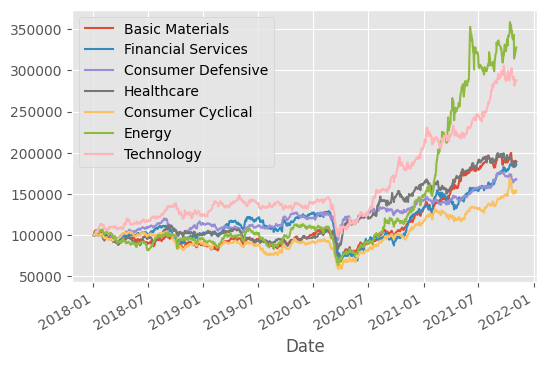

In [ ]:
all_sector_eq_curves.plot()